In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from enum import Enum

In [10]:
assert sys.version != "3.11.5" , "wrong python version"

In [11]:
dataset = pd.read_csv("dataset\student_habits_performance.csv",index_col="student_id")
dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4


<Axes: xlabel='age'>

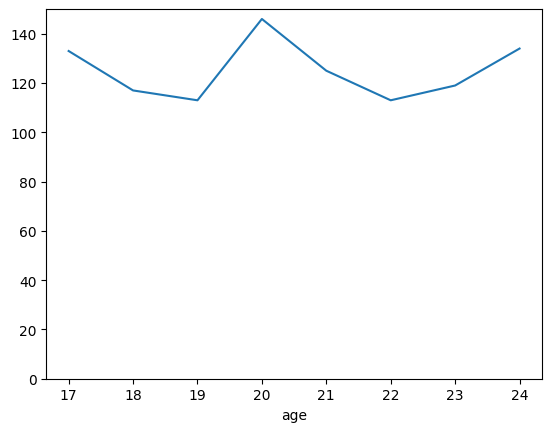

In [12]:
# pour l'age on aimerais avoir le nombre de personne de chaque age
dataset.groupby("age").size().plot(ylim=(0,150))

In [13]:
# repartition par genre
dataset.groupby("gender").size().to_frame('Number')

,Number
gender,
Female,481
Male,477
Other,42


<Axes: xlabel='exam_score'>

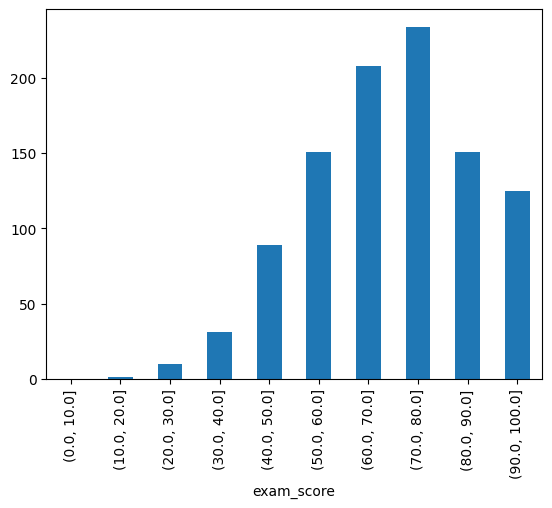

In [14]:
# on veut avoir la répartition des résultats par tranches de 10 de score
pd.cut(dataset["exam_score"],[0,10,20,30,40,50,60,70,80,90,100.0]).value_counts().sort_index().plot(kind="bar")

In [15]:
# On peut ainsi déterminer la moyenne, la médiane et l'écart-type des résultats
moyenne = dataset["exam_score"].mean()
mediane = dataset["exam_score"].median()
ecart_type = dataset["exam_score"].std()
print("moyenne : ",moyenne, ", médiane : ",mediane, " écart-type : ",ecart_type)

moyenne :  69.6015 , médiane :  70.5  écart-type :  16.888563921818257


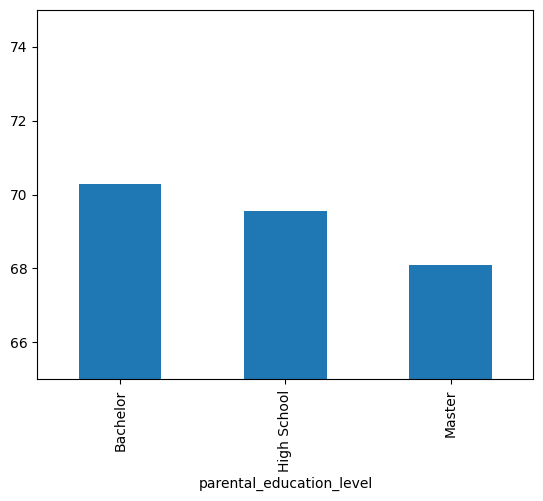

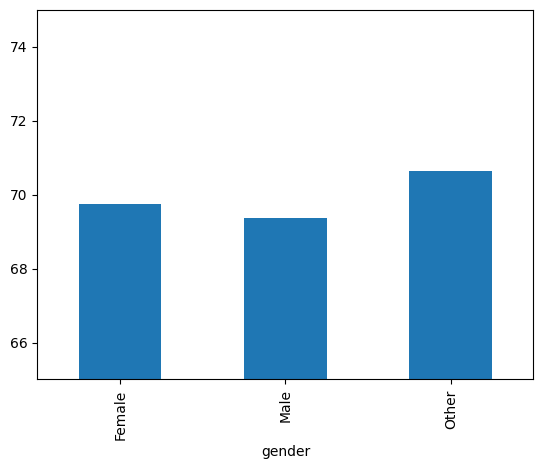

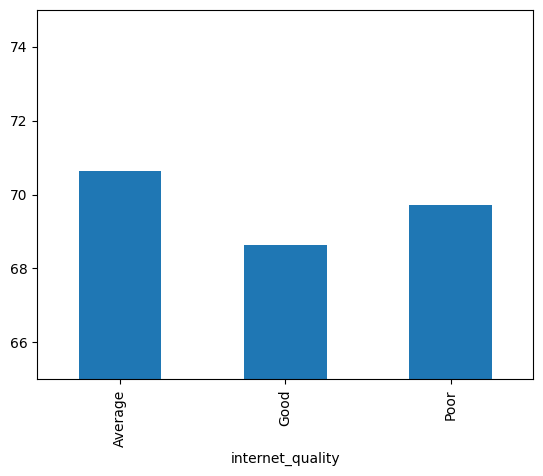

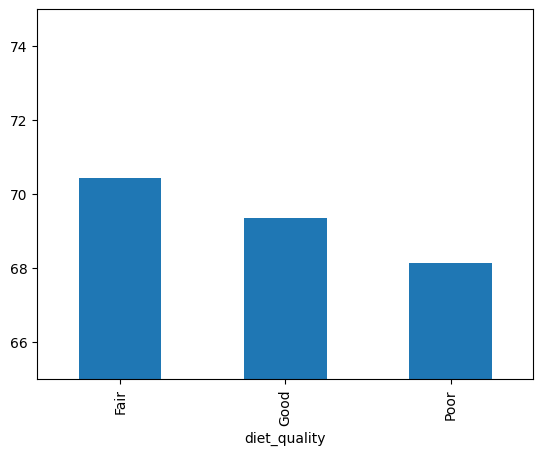

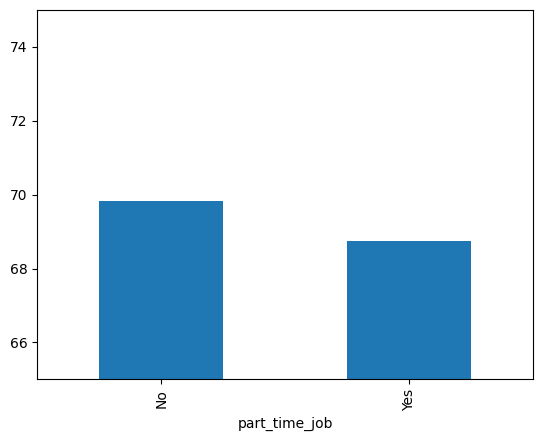

In [16]:
YLIM = (65,75)

dataset.groupby("parental_education_level")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("gender")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("internet_quality")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("diet_quality")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("part_time_job")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()

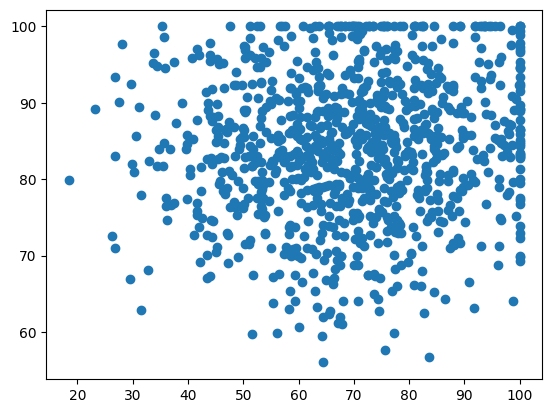

attendance


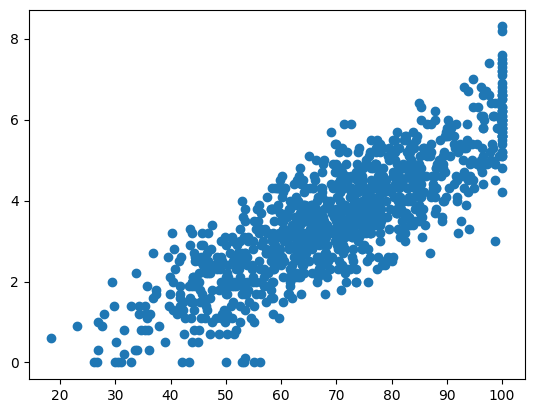

study hours


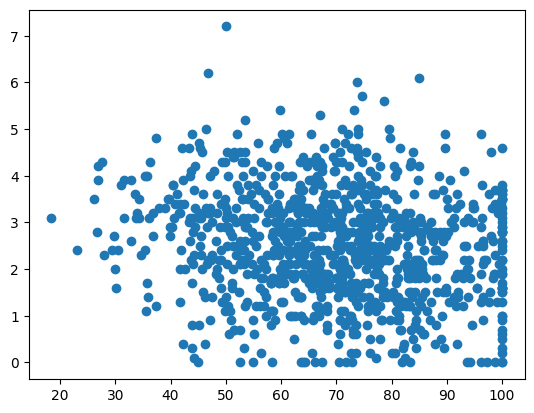

social media hours


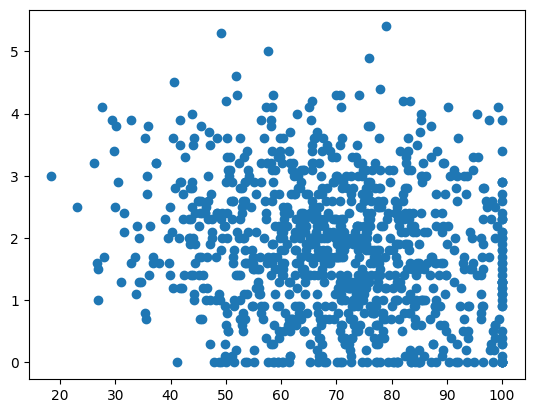

netflix hours


In [17]:
plt.scatter(dataset["exam_score"],dataset["attendance_percentage"])
plt.show()
print("attendance")
plt.scatter(dataset["exam_score"],dataset["study_hours_per_day"])
plt.show()
print("study hours")
plt.scatter(dataset["exam_score"],dataset["social_media_hours"])
plt.show()
print("social media hours")
plt.scatter(dataset["exam_score"],dataset["netflix_hours"])
plt.show()
print("netflix hours")

On arrange maintenant le dataset pour remplacer les string par des int

In [18]:
gender_map = {"Female":0,"Male":1,"Other":2}
job_map = {"No":0,"Yes":1}
diet_map  ={"Poor":0,"Fair":1,"Good":2}
parentlevel_map = {"Bachelor":0,"High School":1,"Master":2}
extraactivity_map = {"No":0,"Yes":1}
internet_map = {"Poor":0,"Average":1,"Good":2}

In [19]:
dataset["gender"] = dataset["gender"].map(gender_map)
dataset["part_time_job"] = dataset["part_time_job"].map(job_map)
dataset["diet_quality"] = dataset["diet_quality"].map(diet_map)
dataset["parental_education_level"] = dataset["parental_education_level"].map(parentlevel_map)
dataset["extracurricular_participation"] = dataset["extracurricular_participation"].map(extraactivity_map)
dataset["internet_quality"] = dataset["internet_quality"].map(internet_map)

dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,1,6,2.0,1,8,1,56.2
S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,2,6,1.0,1,8,0,100.0
S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,0,1,1.0,0,1,0,34.3
S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,0,4,2.0,2,1,1,26.8
S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,1,3,2.0,2,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,1,2,1.0,2,6,1,76.1
S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,0,1,1.0,1,6,1,65.9
S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,2,5,0.0,2,9,1,64.4


<Axes: >

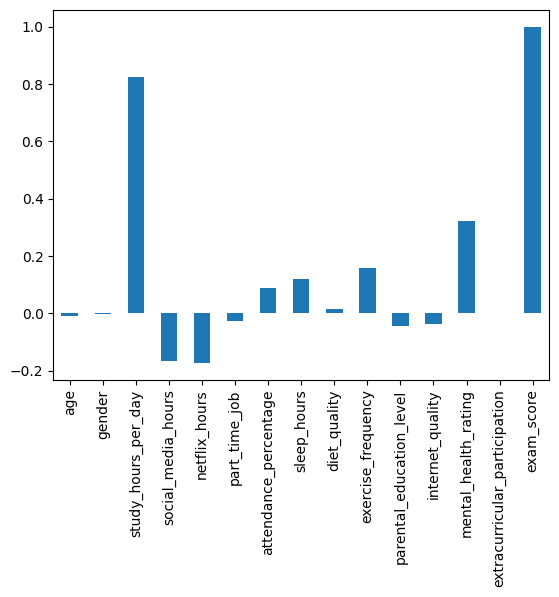

In [20]:
# correlation matrix
dataset.corr()["exam_score"].plot(kind="bar")

In [27]:
dataset["age"]=(dataset["age"]-dataset["age"].min())/(dataset["age"].max()-dataset["age"].min())
dataset["attendance_percentage"]=(dataset["attendance_percentage"]-dataset["attendance_percentage"].min())/(dataset["attendance_percentage"].max()-dataset["attendance_percentage"].min())
dataset["diet_quality"]=(dataset["diet_quality"]-dataset["diet_quality"].min())/(dataset["diet_quality"].max()-dataset["diet_quality"].min())
dataset["exercise_frequency"]=(dataset["exercise_frequency"]-dataset["exercise_frequency"].min())/(dataset["exercise_frequency"].max()-dataset["exercise_frequency"].min())
dataset["extracurricular_participation"]=(dataset["extracurricular_participation"]-dataset["extracurricular_participation"].min())/(dataset["extracurricular_participation"].max()-dataset["extracurricular_participation"].min())
dataset["gender"]=(dataset["gender"]-dataset["gender"].min())/(dataset["gender"].max()-dataset["gender"].min())
dataset["internet_quality"]=(dataset["internet_quality"]-dataset["internet_quality"].min())/(dataset["internet_quality"].max()-dataset["internet_quality"].min())
dataset["mental_health_rating"]=(dataset["mental_health_rating"]-dataset["mental_health_rating"].min())/(dataset["mental_health_rating"].max()-dataset["mental_health_rating"].min())
dataset["netflix_hours"]=(dataset["netflix_hours"]-dataset["netflix_hours"].min())/(dataset["netflix_hours"].max()-dataset["netflix_hours"].min())
dataset["parental_education_level"]=(dataset["parental_education_level"]-dataset["parental_education_level"].min())/(dataset["parental_education_level"].max()-dataset["parental_education_level"].min())
dataset["sleep_hours"]=(dataset["sleep_hours"]-dataset["sleep_hours"].min())/(dataset["sleep_hours"].max()-dataset["sleep_hours"].min())
dataset["social_media_hours"]=(dataset["social_media_hours"]-dataset["social_media_hours"].min())/(dataset["social_media_hours"].max()-dataset["social_media_hours"].min())
dataset["study_hours_per_day"]=(dataset["study_hours_per_day"]-dataset["study_hours_per_day"].min())/(dataset["study_hours_per_day"].max()-dataset["study_hours_per_day"].min())
dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,0.857143,0.0,0.000000,0.166667,0.203704,0,0.659091,0.705882,0.5,1.000000,1.0,0.5,0.777778,1.0,56.2
S1001,0.428571,0.0,0.831325,0.388889,0.425926,0,0.938636,0.205882,1.0,1.000000,0.5,0.5,0.777778,0.0,100.0
S1002,0.571429,0.5,0.168675,0.430556,0.240741,0,0.881818,0.705882,0.0,0.166667,0.5,0.0,0.000000,0.0,34.3
S1003,0.857143,0.0,0.120482,0.541667,0.185185,0,0.340909,0.882353,0.0,0.666667,1.0,1.0,0.000000,1.0,26.8
S1004,0.285714,0.0,0.602410,0.611111,0.092593,0,0.793182,0.250000,0.5,0.500000,1.0,1.0,0.000000,0.0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,0.571429,0.0,0.313253,0.069444,0.296296,0,0.477273,0.632353,0.5,0.333333,0.5,1.0,0.555556,1.0,76.1
S1996,0.000000,0.0,0.349398,0.138889,0.444444,1,0.681818,0.529412,0.0,0.166667,0.5,0.5,0.555556,1.0,65.9
S1997,0.428571,0.5,0.361446,0.361111,0.240741,0,0.134091,0.485294,1.0,0.833333,0.0,1.0,0.888889,1.0,64.4


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [23]:
N1 = 6
N2 = 80
N3 = 6
N4 = 1

epochs = 10 #2000 #3000

# load the dataset
dataset = loadtxt(r'Datasets\ds2000.data', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,[0, 1]]
#print(type(X))
#print(X)
y = dataset[:,2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

# define the model
model = Sequential()
model.add(Dense(N1, input_shape=(2,), activation='relu'))
model.add(Dense(N2, activation='relu'))
model.add(Dense(N3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

# fit the model on the dataset
model.fit(X_train, y_train, epochs=epochs, batch_size=20,validation_data=(X_test, y_test),)

### TEST

dataset = loadtxt(r'Datasets\ds10000.data', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:,[0, 1]]
#print(type(X))
#print(X)
y = dataset[:,2]

X=np.array(X)
predictions = model.predict(X)
predictions = predictions#.reshape(1,-1)

#couleur = [('r' if p>0.5 else 'b') for p in predictions.reshape(1,-1)[0]]
# plot the predictions

XY = np.append(X, predictions, axis=1)
#plt.scatter(X[:,0],X[:,1], s=3, c=couleur)
plt.scatter(XY[:,0][XY[:,2]>=0.5], XY[:,1][XY[:,2]>=0.5], s=3, c='r',label='Class 1')
plt.scatter(XY[:,0][XY[:,2]<0.5], XY[:,1][XY[:,2]<0.5], s=3, c='b',label='Class 0')

#plt.scatter(X, predictions[0], s=3, c='b', label='predicted prices')
plt.legend(["class 1","class 0"])

NameError: name 'loadtxt' is not defined

normaliser toute les catégorie